In [14]:
import csv
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt


In [6]:
MyColor = ListedColormap(['Blue','Yellow'])

In [3]:
file = open("diabetes.csv", "r")
dataset = csv.reader(file)
dataset = np.array(list(dataset))
dataset = np.delete(dataset,0,0)
file.close()

trainingData = dataset[:500]
testData = dataset[500:]
trainData=dataset[:50]

In [5]:
print(testData)

[['2' '117' '90' ... '0.313' '21' '0']
 ['3' '84' '72' ... '0.267' '28' '0']
 ['6' '0' '68' ... '0.727' '41' '1']
 ...
 ['5' '121' '72' ... '0.245' '30' '0']
 ['1' '126' '60' ... '0.349' '47' '1']
 ['1' '93' '70' ... '0.315' '23' '0']]


In [9]:
print(trainingData)

[['6' '148' '72' ... '0.627' '50' '1']
 ['1' '85' '66' ... '0.351' '31' '0']
 ['8' '183' '64' ... '0.672' '32' '1']
 ...
 ['2' '81' '72' ... '0.547' '25' '0']
 ['7' '195' '70' ... '0.163' '55' '1']
 ['6' '154' '74' ... '0.839' '39' '0']]


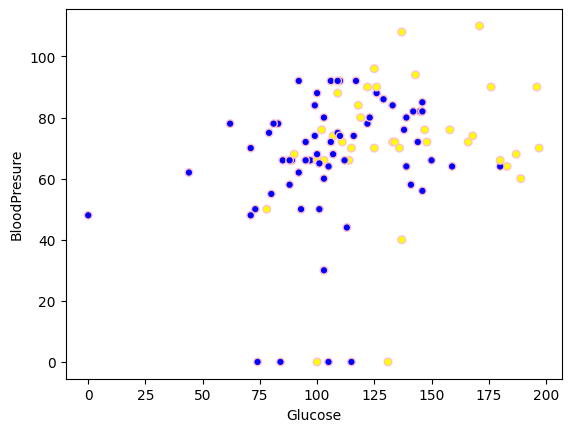

In [13]:
x = np.array(trainData[:,1])
y = np.array(trainData[:,2])
color = list(map(int,np.array(trainData[:,8])))

plt.scatter(list(map(int,x)),list(map(int,y)),c = color, cmap = MyColor ,edgecolor='pink',s=30)
plt.xlabel("Glucose")
plt.ylabel("BloodPresure")
#plt.scatter(np.array(trainData[:,1]),np.array(trainData[:,2]),cmap = 'viridis')
plt.show()

In [7]:
def computeDistance(data1,data2):
  res = 0;
  for i in range(8):
    res += ( float(data1[i]) - float(data2[i])  )**2
  return math.sqrt(res)


In [109]:
def computeKNN(trainingData,point,k):
  distance = []
  for data in trainingData:
    #khai bao dictionary
    label_distance = {
        "label" : data[-1],
        "dis": computeDistance(data,point)
    }
    distance.append(label_distance)
  distance.sort(key = lambda x: x["dis"])
  label = []
  for element in distance:
    label.append(element["label"])
  return label[:k]


In [1]:
def predict(label):
  num1 = 0
  num0 = 0
  for element in label:
    if int(element) == 1:
      num1 = num1 + 1
    else:
      num0 = num0 + 1
  if num1 > num0 :
    return 1
  else:
    return 0

In [111]:
def evaluate(x,y):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    if (x==1 and y == 1):
        tp = 1
    elif (x == 1 and y == 0):
        fn = 1
    elif (y == 1):
        fp = 1
    else:
        tn = 1
    return [tp,fn,fp,tn]

In [119]:
k = 5
TP = 0
FN = 0  
FP = 0  
TN = 0  

for element in testData:
    label = computeKNN(trainingData, element, k)
    #print("True = ", element[-1], "Predict = ", predict(label))
    tp, fn, fp, tn = evaluate(int(element[-1]), predict(label))  
    TP += tp
    FN += fn
    FP += fp
    TN += tn
data_size = len(testData)
#print(data_size)
print("TP =", TP) # True Positive: người bị bệnh được dự đoán là bị bệnh
print("FN =", FN) # False Negative: người bị bệnh được dự đoán là không có bệnh
print("FP =", FP) # False Positive: người không bị bệnh được dự đoán là bị bệnh
print("TN =", TN) # True Negative: người không bị bệnh được dự đoán là không bị bệnh

accuracy =round(float( (TP + TN)/data_size),2)
precision = float(TP/(TP+FP)) # tính tỉ lệ số người thực sự bị bệnh trong những người được dự đoán bị bệnh
recall = float(TP/(TP+FN)) #tính tỉ lệ dự đoán chính xác trong những người bị bệnh

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

TP = 49
FN = 37
FP = 39
TN = 143
Accuracy: 72.00%
Precision: 55.68%
Recall: 56.98%
